In [1]:
import pandas as pd
import numpy as np

import os
import matplotlib.pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages

In [3]:
datadir = "/Users/vesheljinn/Documents/github_repos/methABC/data/crc_with_healthy_labels/"
files = [file for file in os.listdir(datadir) if '.csv' in file]
dflist = list()
for file in files:
    dflist.append(pd.read_csv(datadir+file))

In [15]:
data_flips = list()
for df in dflist:
    tmp = np.tile(0, (8, 8))
    for j in range(0, 8):
        for k in range(0, 8):
            zto = len(df[(df.iloc[:,j]<0.35) & (df.iloc[:,k]>0.65)])
            hto = len(df[(df.iloc[:,j]<0.65) & (df.iloc[:,j]>0.35) & (df.iloc[:,k]>0.65)])
            otz = len(df[(df.iloc[:,k]<0.35) & (df.iloc[:,j]>0.65)])
            htz = len(df[(df.iloc[:,k]<0.65) & (df.iloc[:,k]>0.35) & (df.iloc[:,j]>0.65)])
            zth = len(df[(df.iloc[:,k]<0.65) & (df.iloc[:,k]>0.35) & (df.iloc[:,j]<0.35)])
            oth = len(df[(df.iloc[:,k]<0.65) & (df.iloc[:,k]>0.35) & (df.iloc[:,j]>0.65)])
            tmp[j,k] = (zto+hto+otz+htz+zth+oth)
    data_flips.append([df.columns[2][0], tmp/7020])

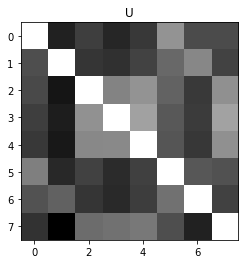

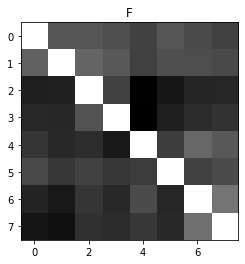

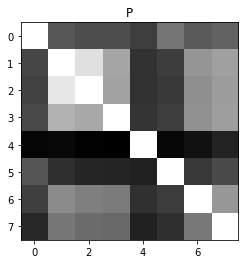

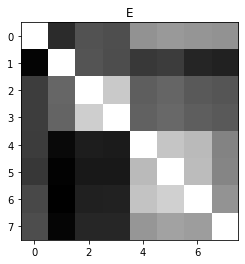

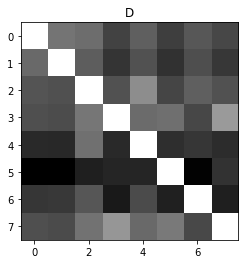

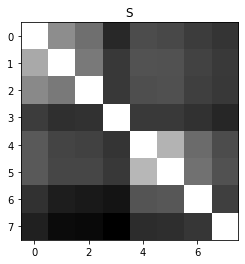

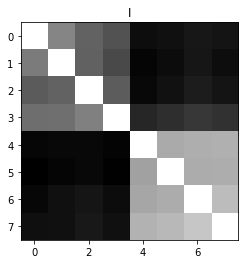

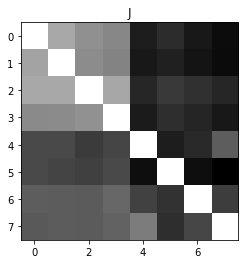

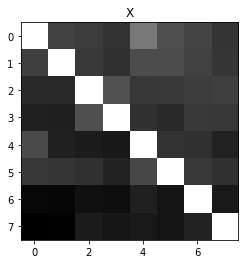

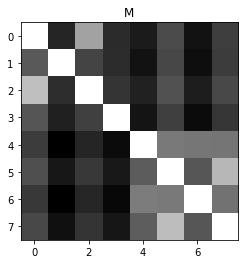

In [17]:
for a in data_flips:
    plt.imshow(a[1], cmap='binary')
    plt.title(a[0])
    plt.show()

In [19]:
simsdir = "/Users/vesheljinn/Documents/github_repos/methABC/data/inter-deme/methylation/"
simfiles = [file for file in os.listdir(simsdir) if '.csv' in file]
simlist = list()
for file in simfiles:
    simlist.append(pd.read_csv(simsdir+file))

In [21]:
sim_flips = list()
for df in simlist:
    tmp = np.tile(0, (8, 8))
    for j in range(0, 8):
        for k in range(0, 8):
            zto = len(df[(df.iloc[:,j]<0.35) & (df.iloc[:,k]>0.65)])
            hto = len(df[(df.iloc[:,j]<0.65) & (df.iloc[:,j]>0.35) & (df.iloc[:,k]>0.65)])
            otz = len(df[(df.iloc[:,k]<0.35) & (df.iloc[:,j]>0.65)])
            htz = len(df[(df.iloc[:,k]<0.65) & (df.iloc[:,k]>0.35) & (df.iloc[:,j]>0.65)])
            zth = len(df[(df.iloc[:,k]<0.65) & (df.iloc[:,k]>0.35) & (df.iloc[:,j]<0.35)])
            oth = len(df[(df.iloc[:,k]<0.65) & (df.iloc[:,k]>0.35) & (df.iloc[:,j]>0.65)])
            tmp[j,k] = (zto+hto+otz+htz+zth+oth)
    sim_flips.append([df.columns[2][0], tmp/50])

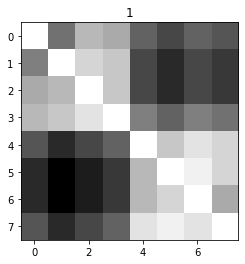

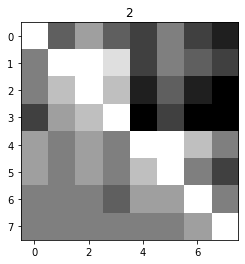

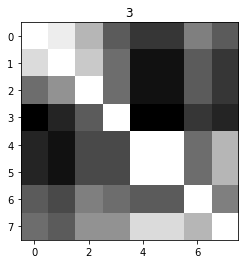

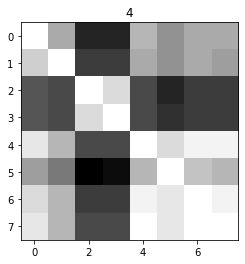

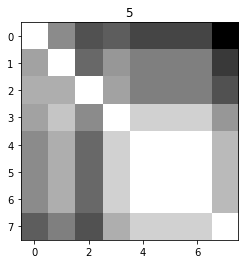

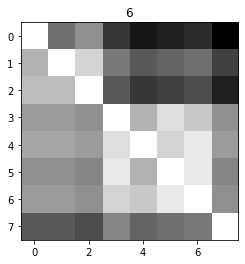

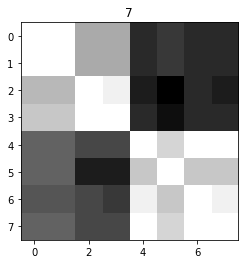

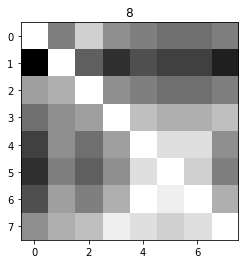

In [24]:
ctr = 1
for a in sim_flips:
    plt.imshow(a[1], cmap='binary')
    plt.title(str(ctr))
    ctr += 1
    plt.show()

In [32]:
diffs = []
for i in range(0, 8):
    tmp = []
    for j in range(0, 10):
        tmp.append(abs(data_flips[j][1] - sim_flips[i][1]))
    diffs.append(tmp)

In [36]:
diffs

[[array([[0.        , 0.09031339, 0.1542735 , 0.16575499, 0.04054131,
          0.11811966, 0.01603989, 0.00324786],
         [0.05319088, 0.        , 0.20595442, 0.19207977, 0.01270655,
          0.1011396 , 0.10159544, 0.0322792 ],
         [0.11831909, 0.20712251, 0.        , 0.08210826, 0.11783476,
          0.09430199, 0.00131054, 0.13384615],
         [0.1531339 , 0.2165812 , 0.1054416 , 0.        , 0.05592593,
          0.00034188, 0.07726496, 0.07792023],
         [0.01968661, 0.00356125, 0.10273504, 0.06415954, 0.        ,
          0.14321937, 0.22296296, 0.0857265 ],
         [0.13176638, 0.07766382, 0.0719943 , 0.00136752, 0.15042735,
          0.        , 0.20108262, 0.16863248],
         [0.07336182, 0.15387464, 0.05475783, 0.00048433, 0.15441595,
          0.12532764, 0.        , 0.12985755],
         [0.02752137, 0.03561254, 0.06712251, 0.03452991, 0.13735043,
          0.21304843, 0.25002849, 0.        ]]),
  array([[0.        , 0.16125356, 0.25754986, 0.25806268, 0.18

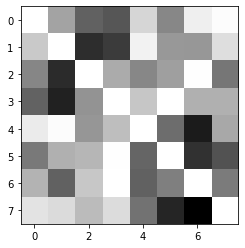

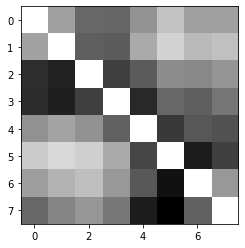

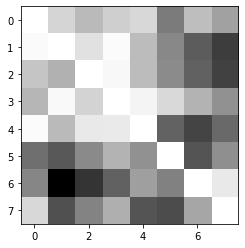

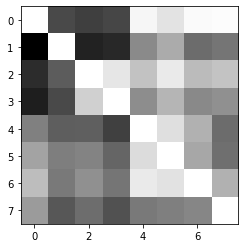

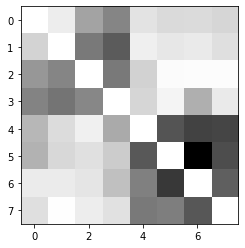

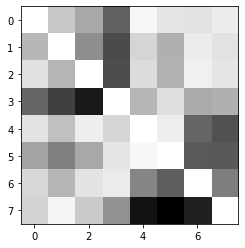

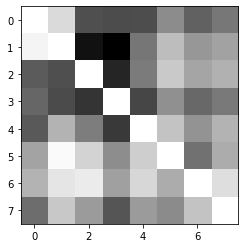

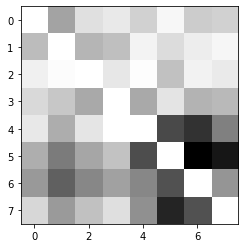

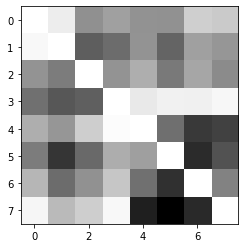

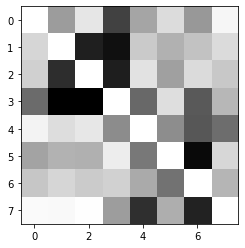

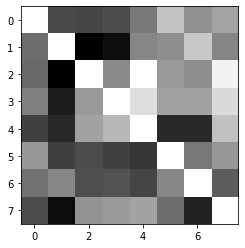

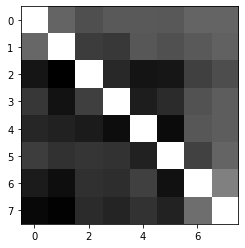

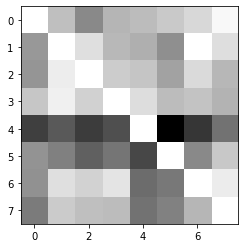

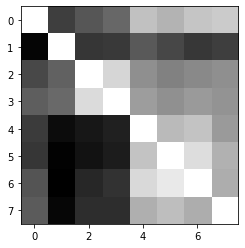

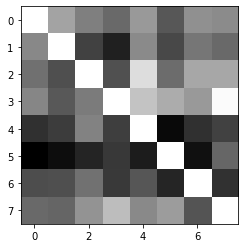

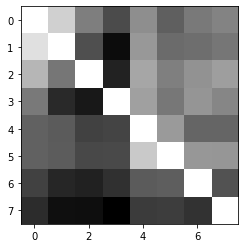

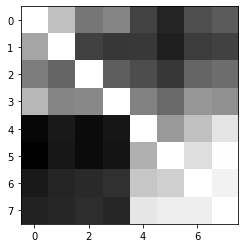

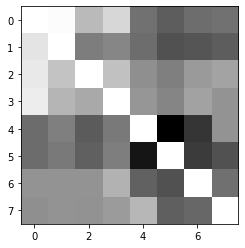

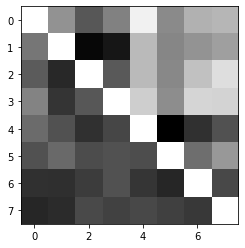

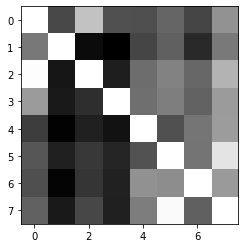

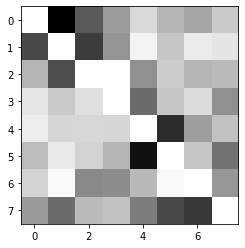

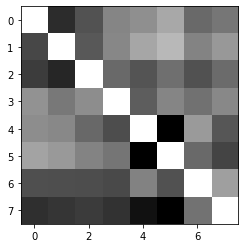

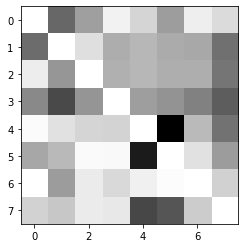

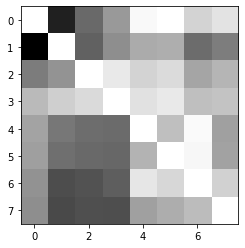

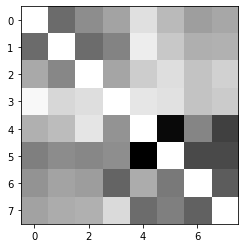

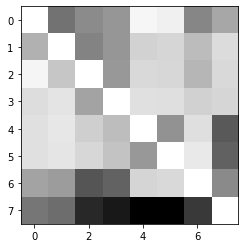

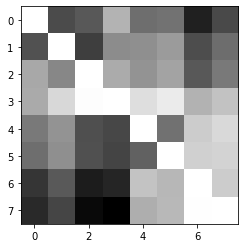

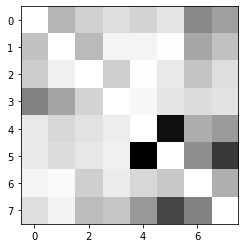

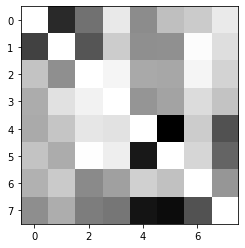

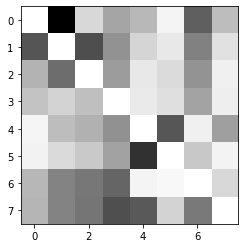

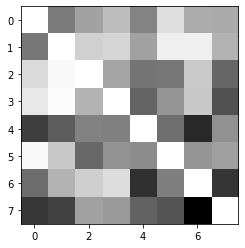

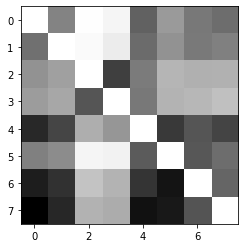

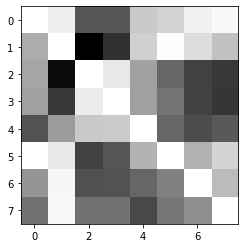

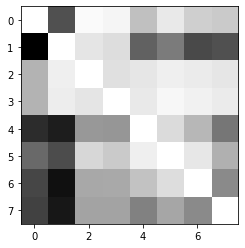

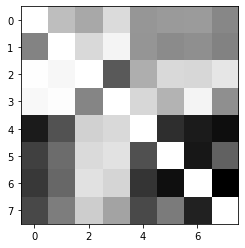

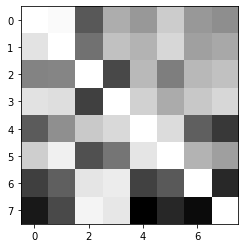

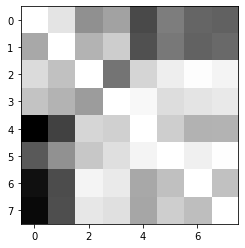

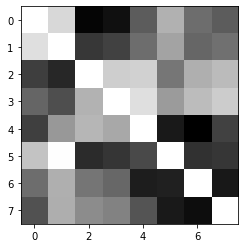

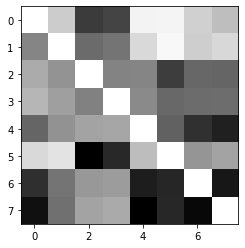

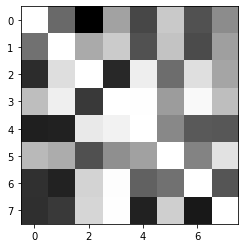

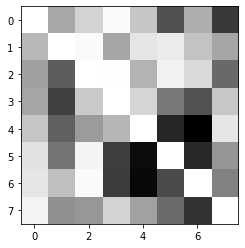

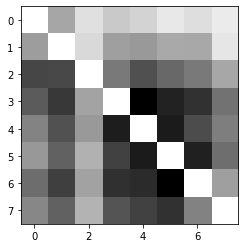

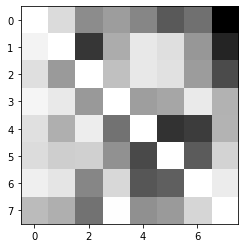

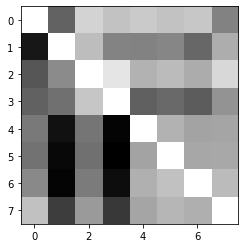

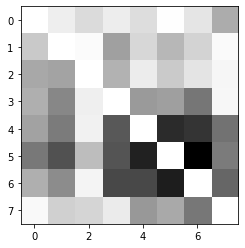

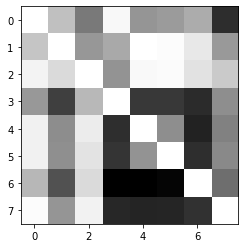

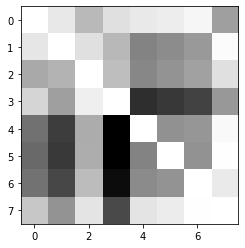

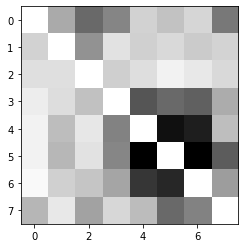

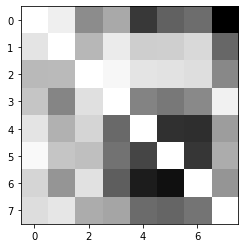

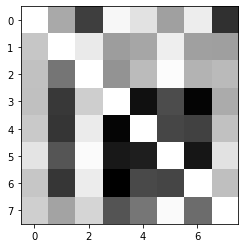

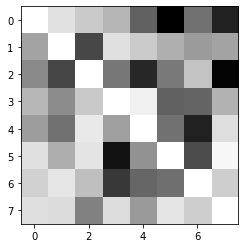

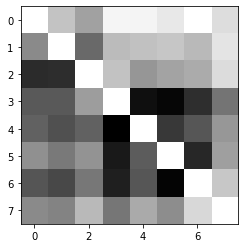

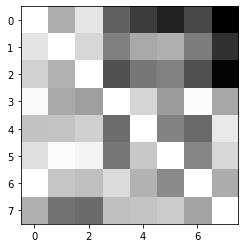

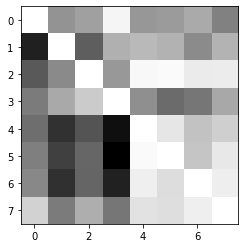

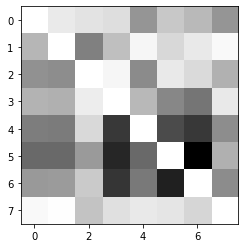

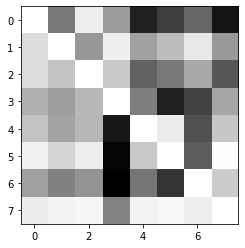

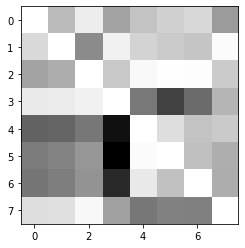

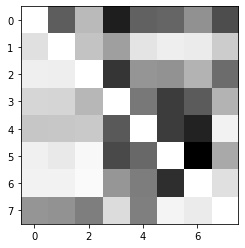

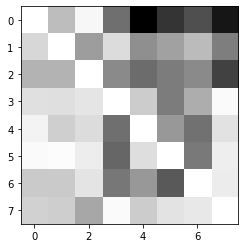

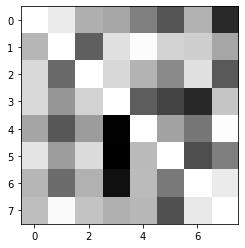

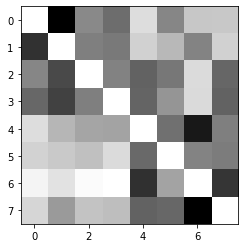

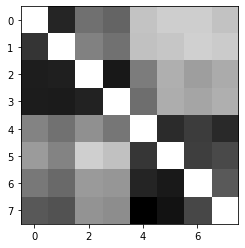

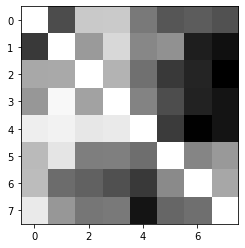

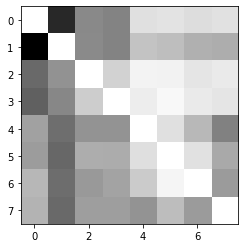

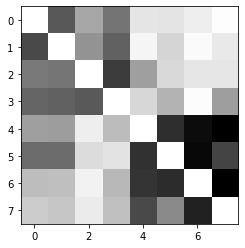

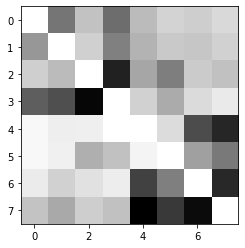

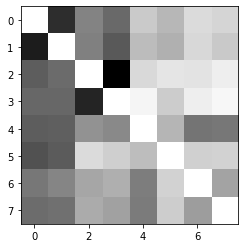

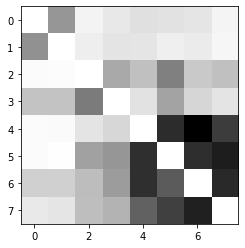

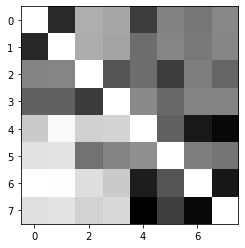

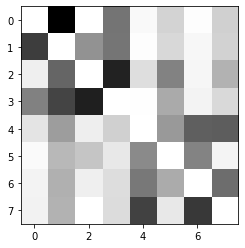

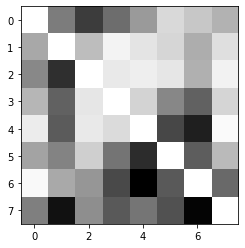

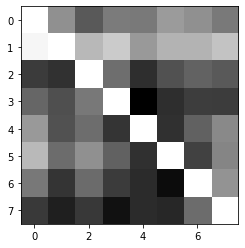

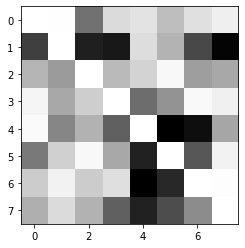

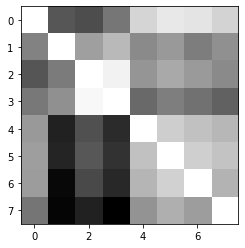

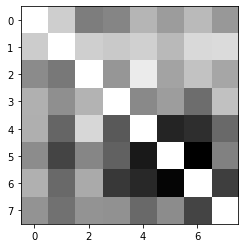

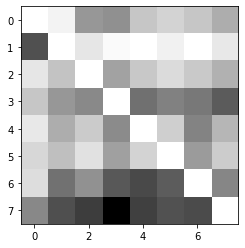

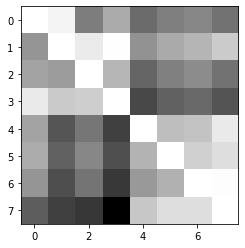

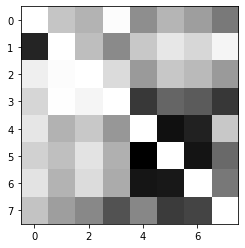

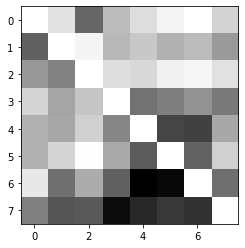

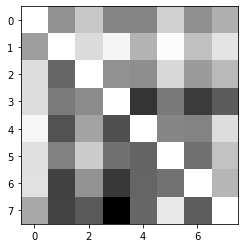

In [37]:
for row in range(len(diffs)):
    for df in range(len(diffs[0])):
        plt.imshow(diffs[row][df], cmap='binary')
        plt.show()